In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [5]:
import warnings

In [6]:
warnings.filterwarnings("ignore")

In [7]:
data = pd.read_csv("netflix userbase.csv")

In [8]:
df = data.copy()

In [9]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [11]:
# taking data overview by using info.
#understanding the data, its type and number of rows and columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [13]:
#the colummns  join date and last payment date should be in datetime format

In [16]:
#converting the datatype of columns from object to datetime
df["Join Date"] = pd.DatetimeIndex(df["Join Date"])
df["Last Payment Date"] = pd.DatetimeIndex(df["Last Payment Date"])

In [17]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            2500 non-null   int64         
 1   Subscription Type  2500 non-null   object        
 2   Monthly Revenue    2500 non-null   int64         
 3   Join Date          2500 non-null   datetime64[ns]
 4   Last Payment Date  2500 non-null   datetime64[ns]
 5   Country            2500 non-null   object        
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   object        
 8   Device             2500 non-null   object        
 9   Plan Duration      2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 195.4+ KB


In [19]:
# can see thatplan duration column has 1 month, here we can cosider to convert all the values
# in month format and to make it as numerical column
df["Plan Duration"].value_counts()

Plan Duration
1 Month    2500
Name: count, dtype: int64

In [21]:
#in plan durAation column all the values are of 1 month only, so we does not need this column in any analysis
# dropping this column

In [22]:
df.drop("Plan Duration", axis=1, inplace=True)

In [23]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone


In [25]:
Total_Monthly_Revenue = df["Monthly Revenue"].sum()
print("Total Revenue : ", Total_Monthly_Revenue, "$")

Total Revenue :  31271 $


In [27]:
df.sort_values("Monthly Revenue", ascending =False)[["User ID", "Monthly Revenue"]].head(10)


,User ID,Monthly Revenue
2499,2500,15
2334,2335,15
2425,2426,15
2426,2427,15
379,380,15
1648,1649,15
1647,1648,15
1645,1646,15
954,955,15
959,960,15


In [28]:
df["Subscription Type"].value_counts()

Subscription Type
Basic       999
Standard    768
Premium     733
Name: count, dtype: int64

In [31]:
rev_sub_type =df.groupby("Subscription Type")["Monthly Revenue"].sum()

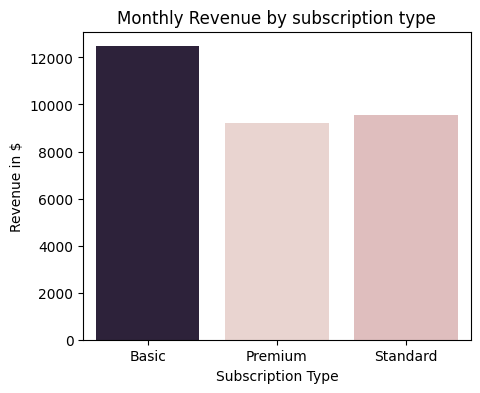

In [34]:
plt.figure(figsize=(5,4))
plt.title("Monthly Revenue by subscription type")
sns.barplot(x=rev_sub_type.index, y=rev_sub_type.values,hue=rev_sub_type.values,legend=False)
plt.ylabel("Revenue in $")
plt.show()

In [35]:
rev_countries = df.groupby("Country")["Monthly Revenue"].sum()

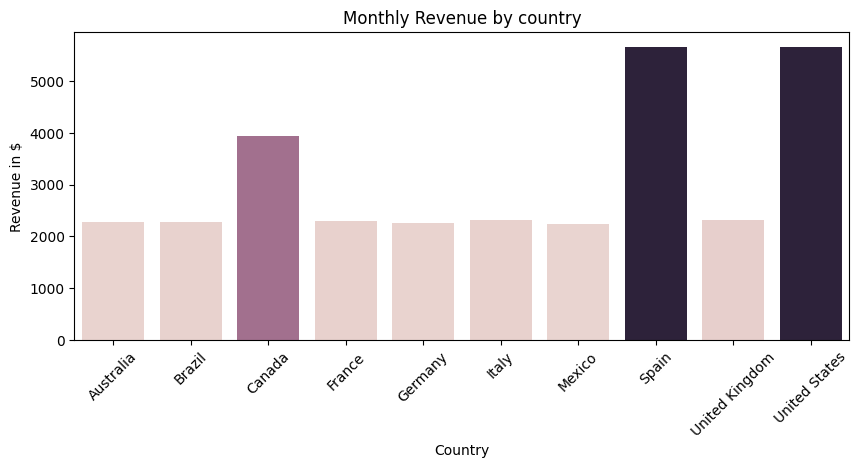

In [39]:
plt.figure(figsize=(10,4))
plt.title("Monthly Revenue by country")
sns.barplot(x=rev_countries.index, y=rev_countries.values,hue=rev_countries.values,legend=False)
plt.ylabel("Revenue in $")
plt.xticks(rotation=45)
plt.show()

In [50]:
df["Age"].value_counts()

Series([], Name: count, dtype: int64)

In [52]:
df["Age"]=pd.cut(df["Age"],bins=3, labels=["25-34","34-42","42-51"])

TypeError: putmask: first argument must be an array

In [53]:
df["Gender"].value_counts()

Gender
Female    1257
Male      1243
Name: count, dtype: int64

In [54]:
rev_gender = df.groupby("Gender")["Monthly Revenue"].sum()

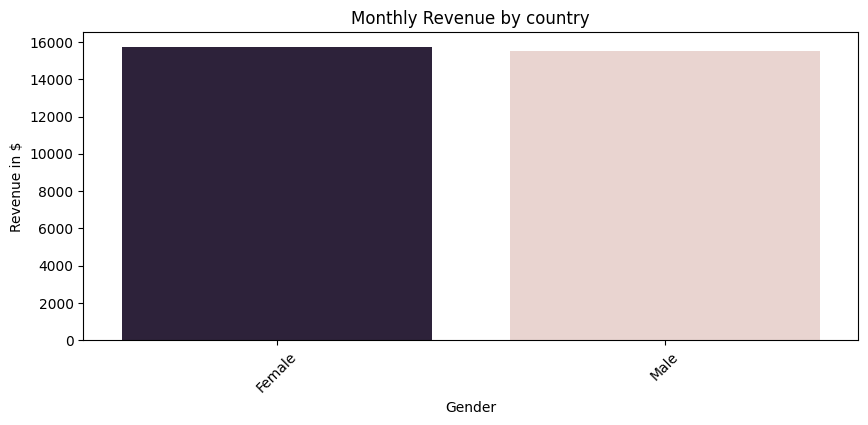

In [55]:
plt.figure(figsize=(10,4))
plt.title("Monthly Revenue by country")
sns.barplot(x=rev_gender.index, y=rev_gender.values,hue=rev_gender.values,legend=False)
plt.ylabel("Revenue in $")
plt.xticks(rotation=45)
plt.show()

In [56]:
df["Device"].value_counts()

Device
Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: count, dtype: int64

In [57]:
rev_device = df.groupby("Device")["Monthly Revenue"].sum()

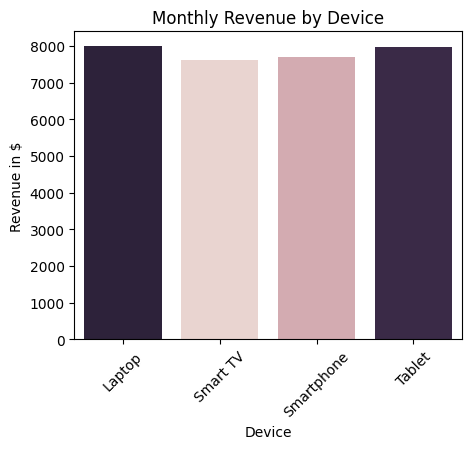

In [59]:
plt.figure(figsize=(5,4))
plt.title("Monthly Revenue by Device")
sns.barplot(x=rev_device.index, y=rev_device.values,hue=rev_device.values,legend=False)
plt.ylabel("Revenue in $")
plt.xticks(rotation=45)
plt.show()

In [60]:
join_date = pd.to_datetime(df["Join Date"])
last_payment =pd.to_datetime(df["Last Payment Date"])

In [65]:
duration = last_payment - join_date

In [66]:
df["Duration"]= duration

In [67]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Duration
0,1,Basic,10,2022-01-15,2023-10-06,United States,NaN,Male,Smartphone,629 days
1,2,Premium,15,2021-05-09,2023-06-22,Canada,NaN,Female,Tablet,774 days
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,NaN,Male,Smart TV,119 days
3,4,Standard,12,2022-10-07,2023-06-26,Australia,NaN,Female,Laptop,262 days
4,5,Basic,10,2023-01-05,2023-06-28,Germany,NaN,Male,Smartphone,174 days


In [68]:
today = pd.to_datetime("2024-01-07")
last = pd.to_datetime("2024-01-01")
today-last

Timedelta('6 days 00:00:00')

In [70]:
df["Duration_Month"]=df["Duration"].dt.days//30

In [71]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Duration,Duration_Month
0,1,Basic,10,2022-01-15,2023-10-06,United States,NaN,Male,Smartphone,629 days,20
1,2,Premium,15,2021-05-09,2023-06-22,Canada,NaN,Female,Tablet,774 days,25
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,NaN,Male,Smart TV,119 days,3
3,4,Standard,12,2022-10-07,2023-06-26,Australia,NaN,Female,Laptop,262 days,8
4,5,Basic,10,2023-01-05,2023-06-28,Germany,NaN,Male,Smartphone,174 days,5


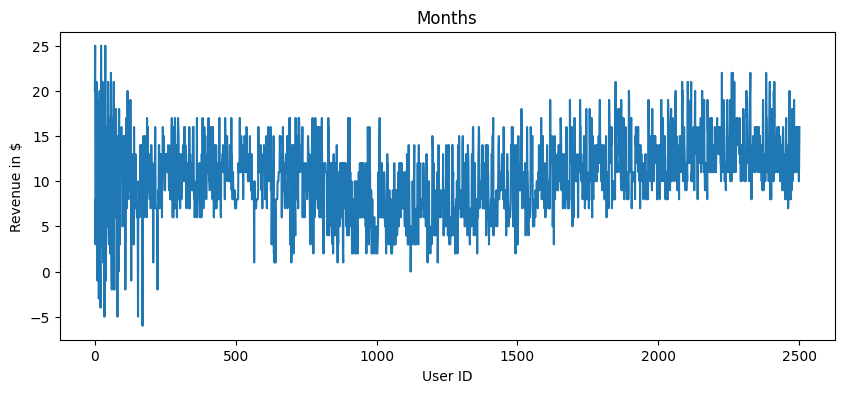

In [73]:
plt.figure(figsize=(10,4))
plt.title("Months")
sns.lineplot(x=df["User ID"], y=df["Duration_Month"])
plt.ylabel("Revenue in $")
plt.show()

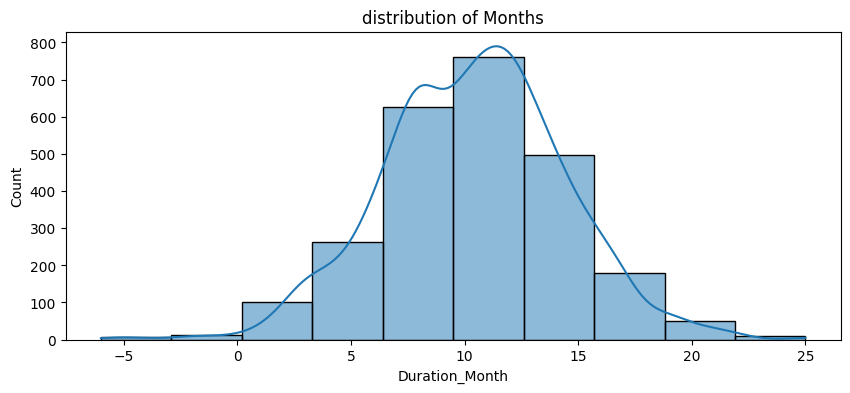

In [74]:
plt.figure(figsize=(10,4))
plt.title("distribution of Months")
sns.histplot(df["Duration_Month"],bins=10,kde=True)
plt.show()

In [76]:
#h0 == average customer churn duration is 10 months
#ha == average customer churn duration is not 10 months

from scipy.stats import shapiro

stats, p= shapiro(df["Duration_Month"])

print("shapiro statistical values=",stats)
print("shapiro p value =",p)
alpha=0.05

if p>alpha:
    print("average customer churn duration is 10 months(h0)")
else:
    print("average customer churn duration is not 10 months(ha)")

shapiro statistical values= 0.9919061660766602
shapiro p value = 1.3147295752080623e-10
average customer churn duration is not 10 months(ha)


In [78]:
pd.crosstab(df["Gender"], df["Subscription Type"])

Subscription Type,Basic,Premium,Standard
Gender,,,
Female,512,364,381
Male,487,369,387


In [79]:
pd.crosstab(df["Country"], df["Subscription Type"]).sort_values("Basic")

Subscription Type,Basic,Premium,Standard
Country,,,
United Kingdom,3,0,180
Mexico,4,0,179
Australia,31,101,51
France,36,147,0
Spain,110,212,129
Canada,145,88,84
Brazil,146,33,4
Germany,149,3,31
Italy,176,4,3


In [83]:
pd.crosstab(df["Device"], df["Subscription Type"])

Subscription Type,Basic,Premium,Standard
Device,,,
Laptop,259,192,185
Smart TV,238,188,184
Smartphone,251,171,199
Tablet,251,182,200


AttributeError: Can only use .str accessor with string values!